# Trivial spam classifier

This is a step-by-step guidance for a simple spam classifier using basic RNN with LSTM layers.

## Prerequisites
You need to ensure you have the dataset available. I used Google Colab, mounted the drive, and used the valid path to the dataset .csv file `dataset_path` specified in the code.

## Acknowledgements

This code is based on the [Parameswara rao](https://github.com/parameswaraRao-13) implementation of the spam email detection classifier.

# Mount drive and define dataset path

In [24]:
from google.colab import drive
drive.mount('/content/drive')

dataset_path = '/content/drive/MyDrive/Colab Notebooks/Trivial spam classifier/spam_or_not_spam.csv'

Mounted at /content/drive


In [59]:
import os

import numpy as np
import pandas as pd

from keras import preprocessing
from keras.layers import Dense, Embedding, Flatten, LSTM
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# Data preparation
Load the dataset and shuffle the data. This is done to randomize the order of the rows, which can be useful when preparing data for training to avoid any bias introduced by the original order of the data.

In [56]:
data=pd.read_csv(dataset_path)
data.head()
data = shuffle(data)

Iterate over each row in the DataFrame using. For each row, convert the content of the 'email' column to a string and append it to the `text` list.

In [47]:
data['label'].value_counts()
text =[]

for index, rows in data.iterrows():
    my_list =str(rows.email)
    text.append(my_list)

len(text)

3000

 ## Text tokenization
 Prepare your text data for a text classification ML model. Tokenize the text data using the Tokenizer class, which is typically used in natural language processing (NLP) tasks.

In [48]:
# Extract the 'label' column as a list.
label = list(data['label'])

# Create an instance of the Tokenizer class with a vocabulary size of 1000.
tokenizer = Tokenizer(num_words=1000)

# Fit the tokenizer on the 'text' data.
tokenizer.fit_on_texts(text)

# Convert the 'text' data into sequences of integers.
sequences = tokenizer.texts_to_sequences(text)

# Split the data into training and testing sets.
x_train = sequences[:2000]
y_train = label[:2000]
x_test = sequences[2000:]
y_test = label[2000:]

Pad the sequences to ensure they all have the same length. In text data, it's common to pad or truncate sequences to a fixed length before feeding them into a neural network.

In [63]:
maxlen = 20
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

# Convert to NumPy arrays.
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_train)
y_test = np.array(y_train)

# Model implementation
Let's initilize a sequential model using Keras, where you can add layers one by one in sequence.
* First, add an Embedding layer to the model. It is often used for handling text data or categorical data where there is a need to convert integer-encoded representations of words or categories into dense vectors of fixed size.

* Then, add a Long Short-Term Memory (LSTM) layer with 32 units to the model. It is a type of recurrent neural network (RNN) layer. It is used for handling sequential data, capturing dependencies over time.

* And lastly, add a dense layer with a single unit and a sigmoid activation function. It is a fully connected layer, where each neuron in the layer is connected to every neuron in the previous layer. In our case `1` indicates that the output is a single scalar value (binary classification).

Then complile the model with the parameters:
* `rmsprop` optimization algorithm used during training (Root Mean Square Propagation adapts the learning rates of each parameter individually)
* `binary_crossentropy` loss function (well-suited for binary classification problems where each example belongs to only one of the two classes)
* `acc` metric used to evaluate the performance of the model during training (accuracy measures the proportion of correctly classified examples out of the total number of examples).

In [58]:
model = Sequential()
model.add(Embedding(2000, 8, input_length=maxlen))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 20, 8)             16000     
                                                                 
 lstm_8 (LSTM)               (None, 32)                5248      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 21281 (83.13 KB)
Trainable params: 21281 (83.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
50/50 [==============================] - 4s 34ms/step - loss: 0.4910 - acc: 0.8350 - val_loss: 0.3617 - val_acc: 0.8400
Epoch 2/10
50/50 [==============================] - 1s 20ms/step - loss: 0.2493 - acc: 0.8856 - val_loss: 0.1861 - val_acc: 0.9400
Epoch 3/10
50/50 [==

# Model training

To train out model, we specify the parameters:

* Epochs: how many times the model will iterate over the entire training dataset.
* Batch size: the number of samples in each batch, or sub-division of the training data after processing which the model weights are updated.
* Validation split: the portion of the training data that will be used for validation (e.g., 20% of the training data).

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

# Learning curves

Once the training is done, we can look at the learning curves that help to

### Training loss
Represents the value of the loss function on the training dataset.

**Interpretation**: A decreasing training loss suggests that the model is improving its ability to fit the training data. If the training loss remains high and doesn't decrease significantly over epochs, it indicates that the model is struggling to fit the training data. This could be a sign of underfitting (also known as **high bias**).

### Validation loss
Represents the value of the loss function on a separate validation dataset not used during training.

**Interpretation**: If the training loss is decreasing but the validation loss is increasing or not decreasing, it could be a sign of overfitting (also known as **high variance**). Overfitting occurs when the model learns to perform well on the training data but fails to generalize to new data.

### Training accuracy
Represents the accuracy of the model on the training dataset. It indicates the proportion of correctly classified samples in the training data.

**Interpretation**: Increasing training accuracy is a positive sign, but high training accuracy alone does not guarantee good generalization. It's possible for a model to memorize the training data without truly learning the underlying patterns.

### Validation accuracy
Represents the accuracy of the model on the validation dataset. It helps assess how well the model generalizes to new data not seen during training.

**Interpretation**: Similar to validation loss, if the training accuracy is high but the validation accuracy is significantly lower or not improving, it may indicate overfitting.


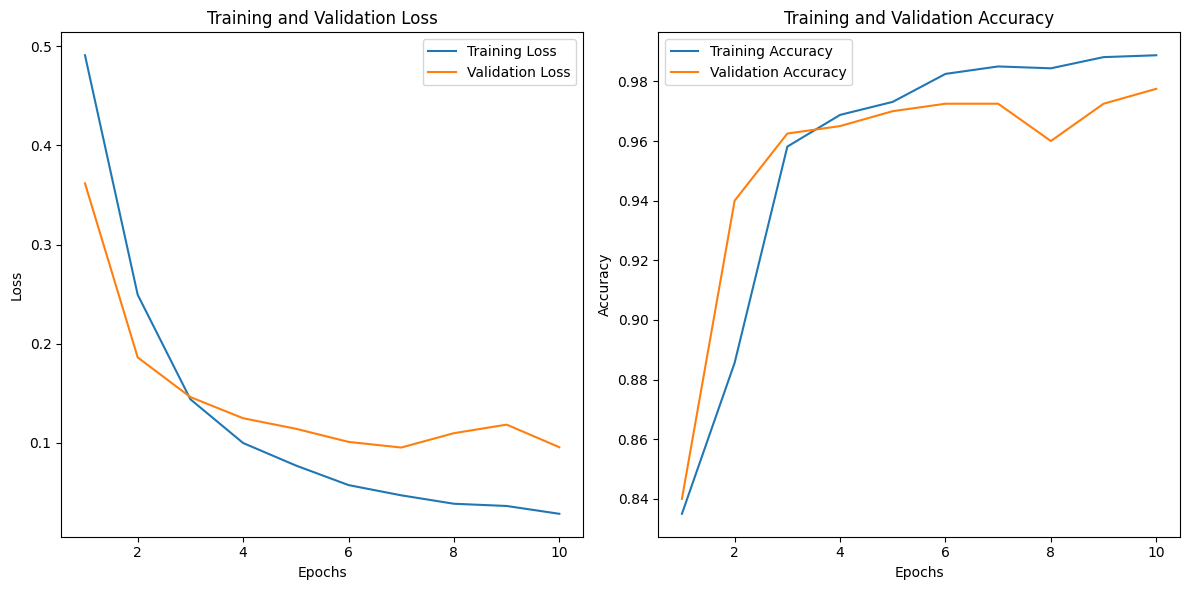

In [61]:
# Get training and validation loss values from the history object.
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get training and validation accuracy values from the history object.
train_acc = history.history.get('acc', [])
val_acc = history.history.get('val_acc', [])

plt.figure(figsize=(12, 6))

# Plot training loss.
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy.
if train_acc and val_acc:
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
    plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()


## Fixing high bias / high variance

At this point I want to insert a nice summary from the [Andrew Ng Machine Learning course](https://www.coursera.org/specializations/machine-learning-introduction?utm_medium=sem&utm_source=gg&utm_campaign=B2C_EMEA_machine-learning-introduction_stanford_FTCOF_specializations_country-multiple-set1&campaignid=20858198833&adgroupid=156245838629&device=c&keyword=andrew%20ng%20machine%20learning&matchtype=p&network=g&devicemodel=&adposition=&creativeid=684249172051&hide_mobile_promo&gad_source=1&gclid=Cj0KCQiAnrOtBhDIARIsAFsSe51HA3UifJdlZAt_9vYGzmb3xWMwz6qwdXEGs4cJiGil-AsCWGQG52kaAmkcEALw_wcB) on the practical approaches to fixing high bias / high variances and model effects.

* Getting more training examples: Fixes high variance
* Trying smaller sets of features: Fixes high variance
* Adding features: Fixes high bias
* Adding polynomial features: Fixes high bias
* Decreasing λ: Fixes high bias
* Increasing λ: Fixes high variance.

### Diagnosing neural networks

* A neural network with fewer parameters is prone to underfitting. It is also computationally cheaper.
* A large neural network with more parameters is prone to overfitting. It is also computationally expensive. In this case you can use regularization (increase λ) to address the overfitting.

Using a single hidden layer is a good starting default. You can train your neural network on a number of hidden layers using your cross validation set. You can then select the one that performs best.

### Model complexity effects

* Lower-order polynomials (low model complexity) have high bias and low variance. In this case, the model fits poorly consistently.

* Higher-order polynomials (high model complexity) fit the training data extremely well and the test data extremely poorly. These have low bias on the training data, but very high variance.

* In reality, we would want to choose a model somewhere in between, that can generalize well but also fits the data reasonably well.


# Model evaluation

Now let's assess the performance of the trained model on a test dataset.

In [64]:
result=model.evaluate(x_test,y_test)
print("test loss:{}\ntest accuracy:{}".format(result[0],result[1]))

63/63 [==============================] - 0s 5ms/step - loss: 0.0348 - acc: 0.9905
test loss:0.03478585183620453
test accuracy:0.9904999732971191


**Test loss**: represents the difference between the model's predictions and the actual labels on the test data. In this case it is relatively low.

**Test accuracy**: measures the proportion of correctly classified examples in the test dataset. In this case, test accuracy is 99.05%. This is a high accuracy, suggesting that the model is making accurate predictions on the test data.